# Presentation for tree regression models in python
In this notebook, I present the functionalities of tree regression. For this purpose we use an artificial data set.

## Loading Libraries

In [1]:
# tree regression in scikit-learn
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from sklearn import tree

# import export_graphviz
from sklearn.tree import export_graphviz

from matplotlib import pyplot as plt
import graphviz


/Users/ystaudt/opt/anaconda3/envs/ys/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Define Data Set

In [3]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

Looking at the data set

In [4]:
X.shape

(1000, 10)

## Defining and fit the model

In [5]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [6]:
regressor.score(X, y)

1.0

## Prediction

In [7]:
# make a single prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = regressor.predict(row)
print('Prediction: %.3f' % yhat[0])

Prediction: -66.045


## Visualization of the prediction tree

Print text representation

In [8]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_4 <= 0.03
|   |--- feature_5 <= -0.28
|   |   |--- feature_4 <= -0.84
|   |   |   |--- feature_5 <= -1.31
|   |   |   |   |--- feature_4 <= -1.17
|   |   |   |   |   |--- feature_4 <= -2.17
|   |   |   |   |   |   |--- feature_6 <= 0.25
|   |   |   |   |   |   |   |--- value: [-350.11]
|   |   |   |   |   |   |--- feature_6 >  0.25
|   |   |   |   |   |   |   |--- value: [-361.76]
|   |   |   |   |   |--- feature_4 >  -2.17
|   |   |   |   |   |   |--- feature_0 <= -1.48
|   |   |   |   |   |   |   |--- feature_6 <= 0.53
|   |   |   |   |   |   |   |   |--- value: [-273.05]
|   |   |   |   |   |   |   |--- feature_6 >  0.53
|   |   |   |   |   |   |   |   |--- value: [-267.43]
|   |   |   |   |   |   |--- feature_0 >  -1.48
|   |   |   |   |   |   |   |--- feature_1 <= -0.57
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.96
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -1.43
|   |   |   |   |   |   |   |   |   |   |--- value: [-315.21]
|   |   |   |   |   |   

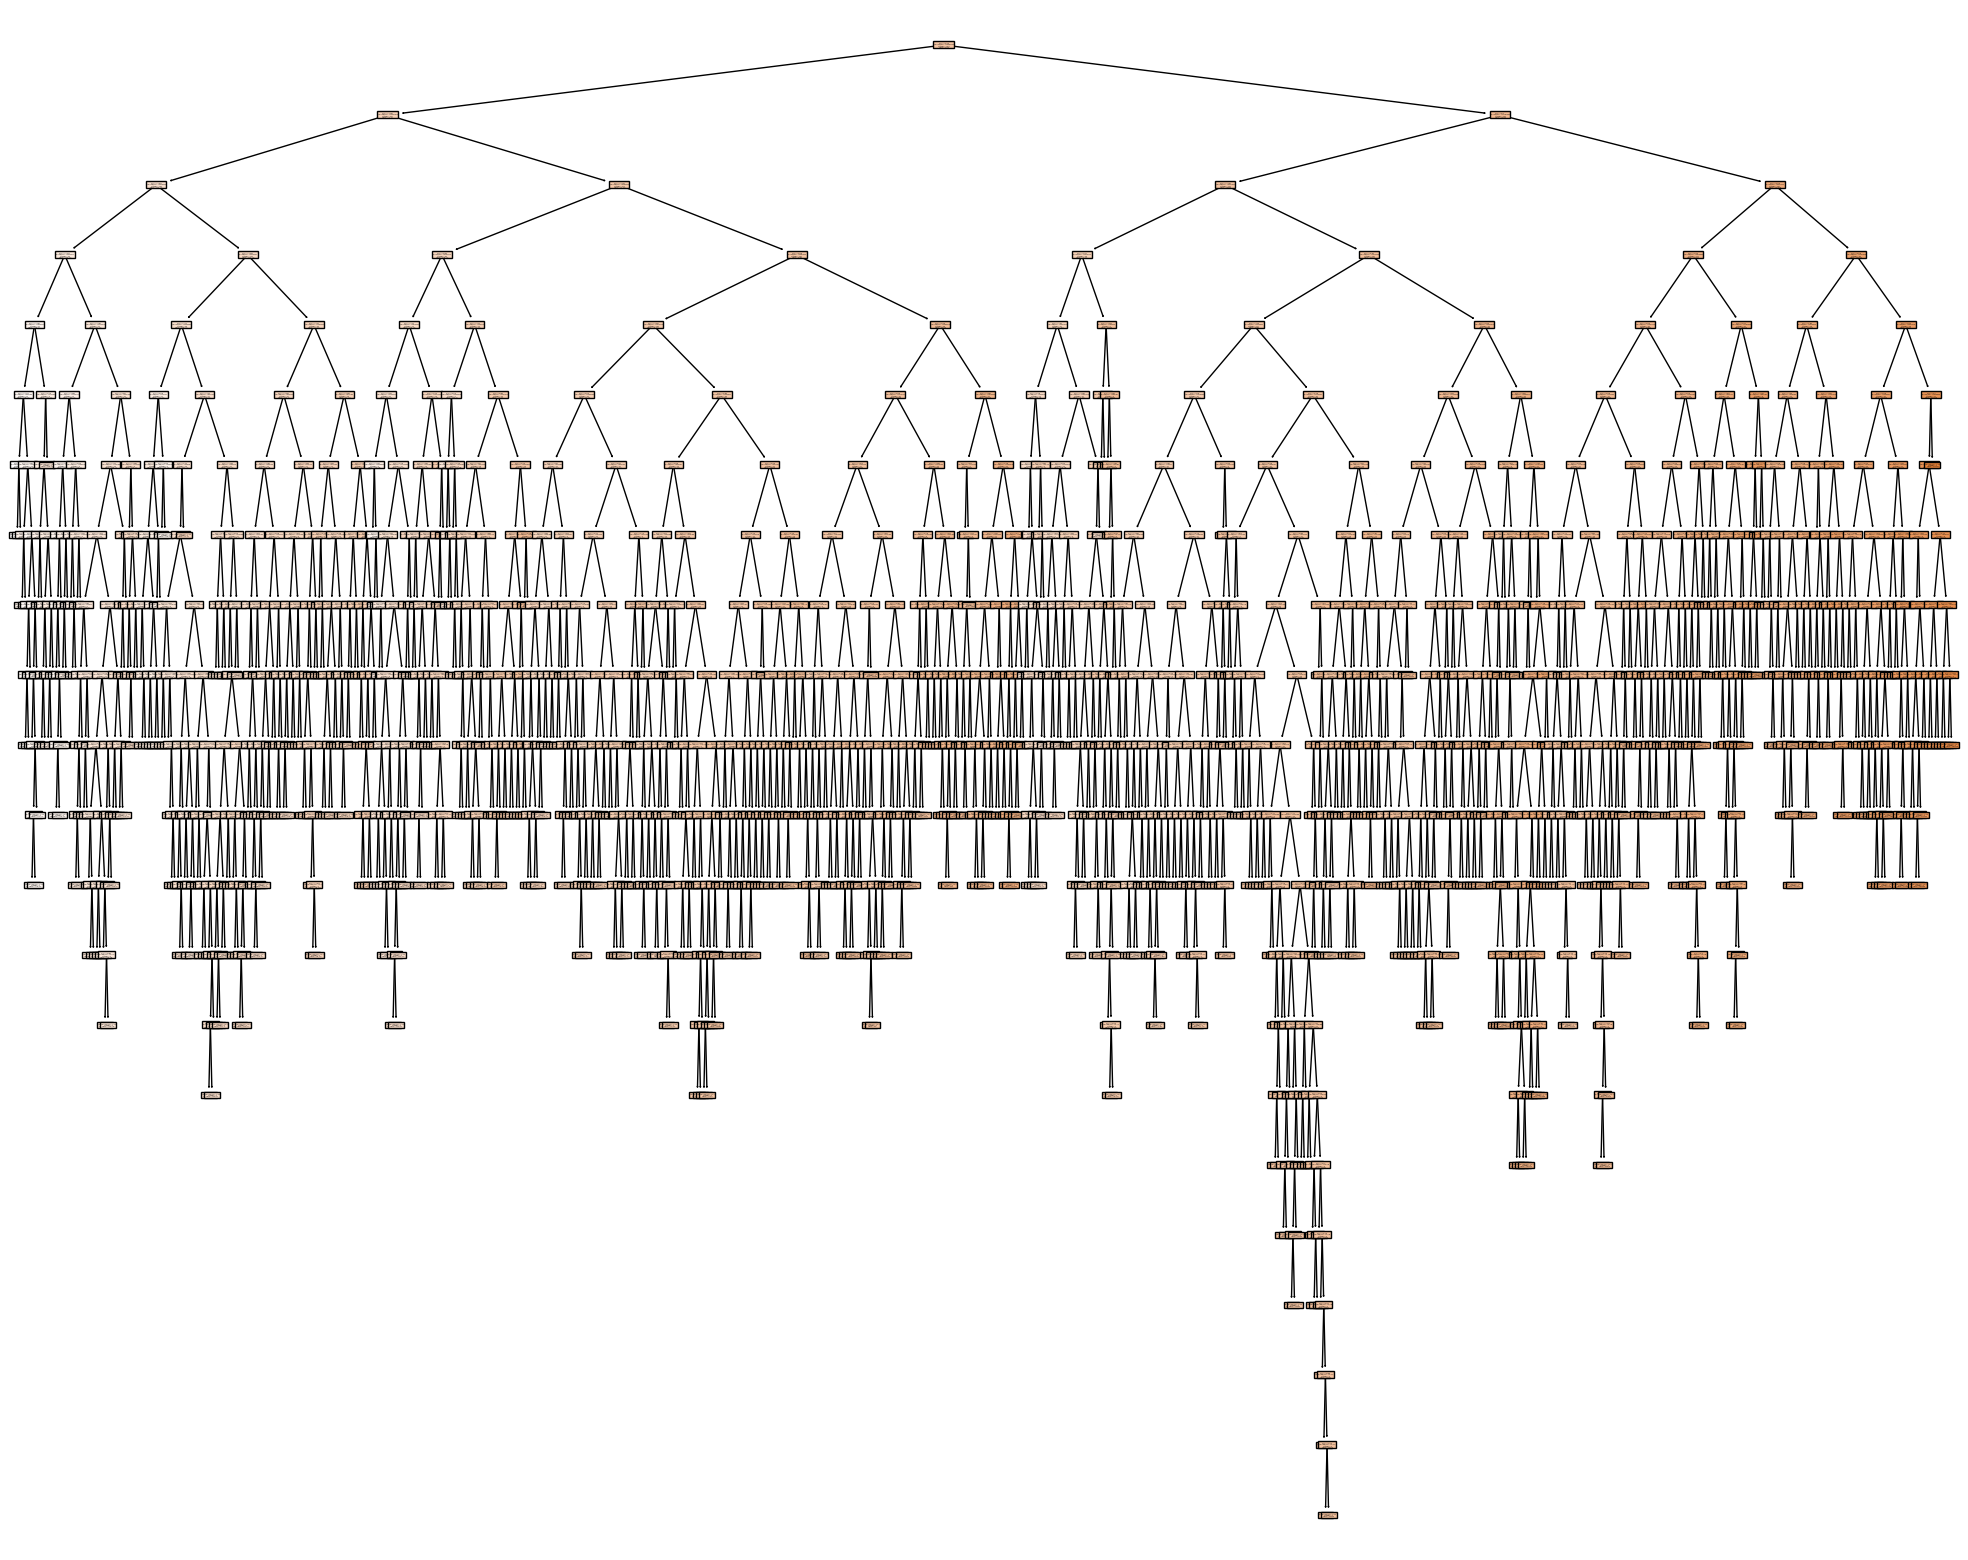

In [9]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor,
                   #feature_names=iris.feature_names,
                   #class_names=iris.target_names,
                   filled=True)

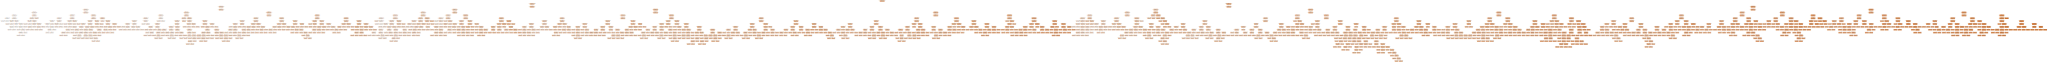

In [10]:
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None,
                                #feature_names=iris.feature_names,
                                #class_names=iris.target_names,
                                filled=True)
#Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

## Pruning tree

In [9]:
path = regressor.cost_complexity_pruning_path(X,y)

Printing the penalization parameters alpha

In [10]:
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 3.91866479e-10, 1.51554559e-09, 3.37995051e-09,
       1.60980600e-07, 7.32316251e-07, 8.50582413e-07, 9.44203266e-07,
       2.85928102e-06, 3.13408744e-06, 3.47498465e-06, 3.61174977e-06,
       4.73989377e-06, 7.46154875e-06, 1.00361441e-05, 1.30580130e-05,
       1.71465898e-05, 2.02879771e-05, 2.58848057e-05, 2.61009027e-05,
       2.84607703e-05, 2.94523051e-05, 3.74811276e-05, 4.01732898e-05,
       4.46089049e-05, 4.63389898e-05, 4.66938908e-05, 4.73399243e-05,
       5.66931170e-05, 6.01437346e-05, 6.07814988e-05, 6.14678426e-05,
       6.20988372e-05, 7.13234422e-05, 7.51633955e-05, 7.81584168e-05,
       8.06064464e-05, 8.13478391e-05, 8.78324055e-05, 9.62374261e-05,
       1.04242862e-04, 1.14767118e-04, 1.18650330e-04, 1.19734861e-04,
       1.20033030e-04, 1.21317145e-04, 1.27362750e-04, 1.29683163e-04,
       1.31287234e-04, 1.34615946e-04, 1.39517845e-04, 1.42383966e-04,
       1.57922093e-04, 1.62785084e-04, 1.65335724e-04, 1.66619864e-04,
      

Evaluate the tree for all alphas. In this example as I do not have a test sample, I use repeated k-fold cross-validation.
As result I save the mean value per score.

In [26]:
mean_n_scores, std_n_scores=[],[]
# setting up the cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

for i in alphas:
    # evaluate the model
    model = DecisionTreeRegressor(ccp_alpha=i)

    n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    mean_n_scores.append(mean(n_scores))
    std_n_scores.append(std(n_scores))
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


/Users/ystaudt/opt/anaconda3/envs/ys/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ystaudt/opt/anaconda3/envs/ys/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ystaudt/opt/anaconda3/envs/ys/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ystaudt/opt/anaconda3/envs/ys/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of S

MAE: -30.153 (3.421)
MAE: -30.371 (3.097)
MAE: -30.570 (3.137)
MAE: -30.347 (3.352)
MAE: -30.159 (3.386)
MAE: -30.430 (2.955)
MAE: -30.387 (3.124)
MAE: -30.390 (3.099)
MAE: -30.096 (3.128)
MAE: -30.413 (3.119)
MAE: -30.430 (3.288)
MAE: -30.417 (3.313)
MAE: -30.653 (3.074)
MAE: -30.015 (3.032)
MAE: -30.419 (3.148)
MAE: -30.213 (3.174)
MAE: -30.282 (3.410)
MAE: -30.593 (3.159)
MAE: -30.168 (3.440)
MAE: -30.388 (3.149)
MAE: -30.295 (3.325)
MAE: -30.643 (3.233)
MAE: -30.474 (3.042)
MAE: -30.568 (2.984)
MAE: -30.160 (3.156)
MAE: -30.411 (3.710)
MAE: -30.113 (3.013)
MAE: -30.694 (3.271)
MAE: -30.420 (3.329)
MAE: -30.303 (3.236)
MAE: -30.317 (3.171)
MAE: -30.341 (3.053)
MAE: -30.214 (3.303)
MAE: -30.462 (3.132)
MAE: -30.210 (3.159)
MAE: -30.482 (3.300)
MAE: -30.542 (3.001)
MAE: -30.313 (3.156)
MAE: -30.524 (3.251)
MAE: -30.575 (3.233)
MAE: -30.223 (3.232)
MAE: -30.459 (2.823)
MAE: -30.568 (3.115)
MAE: -30.428 (3.289)
MAE: -30.737 (3.464)
MAE: -30.440 (3.299)
MAE: -30.738 (2.917)
MAE: -30.260 

Plotting the results. We use the negative mean squared error as after the convention of sklearn as higher return values are better than lower return values.

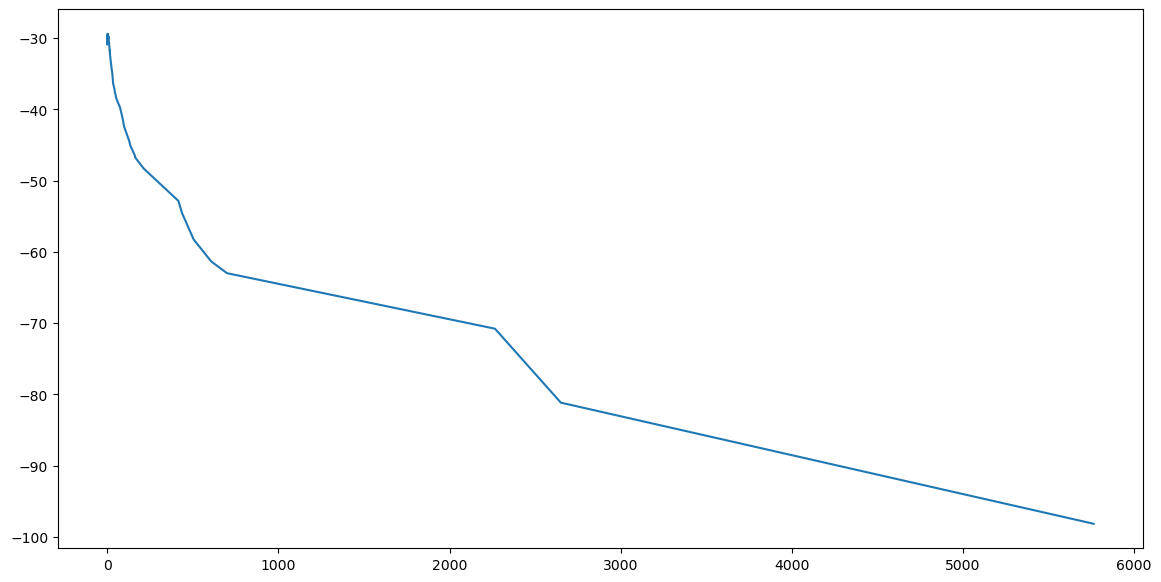

In [27]:
plt.figure(figsize=(14,7))
plt.plot(alphas, mean_n_scores)

Saving the results in data frame for further use

In [34]:
res = pd.DataFrame({'alpha':alphas,'score':mean_n_scores})

In [35]:
res.head()

,alpha,score
0,0.000000e+00,-30.153030
1,3.918665e-10,-30.371374
2,1.515546e-09,-30.569851
3,3.379951e-09,-30.346882
4,1.609806e-07,-30.159119


Extracting the maximum value

In [44]:
res[['score']].max()

score   -29.402221
dtype: float64

In [56]:
alpha_best = res[res.score==max(res.score)]
alpha_best

,alpha,score
838,2.330711,-29.402221


Evaluating the model for the best value

In [57]:
model = DecisionTreeRegressor(ccp_alpha=alpha_best._get_value(838,'alpha'))